# Исследование объявлений о продаже квартир

***Цель исследования*** - установить параметры, которые влияют на рыночную стоимость объектов недвижимости

***Описание исследования***

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться установить параметры, которые влияют на рыночную стоимость недвижимости. 

***Ход исследования***

Необходимо произвести проверку данных на наличие пропусков, аномалий. 
Произведем предобработку данных для устранения данных ошибок, чтобы они не влияли на ход исследования. 
Рассчитаем и добавим в таблицу дополнительные необходимые параметры для проведения исследования. 
Произведем исследовательский анализ данных. 

## Изучение данных из файла

Импортируем библиотеку pandas для работы с таблицей и добавляем какое количество столбцов максимально отображать, чтобы все столбцы таблицы выводились на экран:

In [1]:
# импорт библиотеки pandas
import pandas as pd

# просим pandas отображать до 50 столбцов в таблице
pd.options.display.max_columns = 50

# избавляемся от экспоненциального вида числен
pd.set_option('float_format', '{:f}'.format)

Прочитаем файл real_estate_data.csv из папки /datasets и сохраним его в переменной data:

In [2]:
# чтение файла с данными, с учетом разделителя \t и сохранение его в переменной data
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Ознакомимся с данными и выведем первые 5 строк таблицы:

In [3]:
# выводим первые 5 строк таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000000,108.000000,2019-03-07T00:00:00,3,2.700000,16.000000,51.000000,8,NaN,False,False,25.000000,NaN,Санкт-Петербург,18863.000000,16028.000000,1.000000,482.000000,2.000000,755.000000,NaN
1,7,3350000.000000,40.400000,2018-12-04T00:00:00,1,NaN,11.000000,18.600000,1,NaN,False,False,11.000000,2.000000,посёлок Шушары,12817.000000,18603.000000,0.000000,NaN,0.000000,NaN,81.000000
2,10,5196000.000000,56.000000,2015-08-20T00:00:00,2,NaN,5.000000,34.300000,4,NaN,False,False,8.300000,0.000000,Санкт-Петербург,21741.000000,13933.000000,1.000000,90.000000,2.000000,574.000000,558.000000
3,0,64900000.000000,159.000000,2015-07-24T00:00:00,3,NaN,14.000000,NaN,9,NaN,False,False,NaN,0.000000,Санкт-Петербург,28098.000000,6800.000000,2.000000,84.000000,3.000000,234.000000,424.000000
4,2,10000000.000000,100.000000,2018-06-19T00:00:00,2,3.030000,14.000000,32.000000,13,NaN,False,False,41.000000,NaN,Санкт-Петербург,31856.000000,8098.000000,2.000000,112.000000,1.000000,48.000000,121.000000


Получим общую информацию о таблице:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца. Типы данных - bool, float, int, object.

Согласно документации к данным:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

Исходя из выведенных данных заметно:
- в названиях столбцов есть отклонения от хорошего стиля
- во многих столбцах есть большое количество пропусков значений, необходимо их заменить
- есть три столбца (first_day_exposition, is_apartment, locality_name) с типом данных object. В двух из них будет корректно поменять тип данных для удобства обработки
- некоторые данные столбцы имеет смысл перевести в тип int (например, balcony, parks_around3000 и другие)

### Вывод

Мы открыли файл и предварительно изучили данные. 
В таблице представленные данные из объявлений на ресурсе Я. Недвижимость. В данных замечено большое количество пропусков, которые необходимо заменить для проведения исследования. Также необходимо поработать с типом данных некоторых столбцов. 

## Предобработка данных

Для начала предобработки данных необходимо привести заголовки столбцов к единому стилю. В столбцах cityCenters_nearest, parks_around3000, ponds_around3000 есть отклонения от хорошего стиля, приведем их к единому формату:

In [5]:
# переименовываем столбцы
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000':'parks_around_3000',
                            'ponds_around3000':'ponds_around_3000'})

# проверяем новые названия столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В столбцах floor, last_price, open_plan, rooms, studio, total_area, total_images в целом нет пропущенных значений, типы данных корректны. 

В столбцах balcony, parks_around_3000, ponds_around_3000 логично заменить пропущенные данные нулями, так как пропуски обозначают вероятно, что в квартире нет балкона или рядом непосредственно нет парков\водоемов:

In [6]:
# перебор названий столбцов в цикле, замена пропущенных значений на ноль, преобразование данные в целочисленные
columns_to_replace = ['balcony','parks_around_3000','ponds_around_3000']

for column in columns_to_replace:
    data[column] = data[column].fillna('0')
    data[column] = data[column].astype(int)

# проверяем, что нет пропусков    
data['balcony'].unique()
data['parks_around_3000'].unique()
data['ponds_around_3000'].unique()

array([2, 0, 3, 1])

Вероятно, что все пропущенные значения столбца is_apartment говорят нам о том, что объекты недвижимости, где нет этого указания являются жилами помещениями. Заменим все пропуски данного столбца значением False:

In [7]:
# проверяем количество значений до замены
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [8]:
# заменяем пропуски в столбце is_apartment на False
data['is_apartment'] = data['is_apartment'].fillna(False)
# проверяем значения после замены
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Далее для удобства анализа приведем значения столбца first_day_exposition к более понятному и наглядному отображению даты и времени:

In [9]:
# приводим значения даты столбца first_day_exposition к красивому виду
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S') 
# выводим первые 5 строк столбца для проверки результата
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

В столбце floors_total пропущено ряд значений. Есть вероятность, что значения пропущены, например, если это дом с одной квартирой на одном единственном этаже. Попробуем проверить есть ли какая-либо закономерность в данных пропусках. 
Посчитаем количество пропущенных значений данного столбца:

In [10]:
# считаем пропущенные значения стобца floors_total
data['floors_total'].isna().sum()

86

Пропусков всего 86. Проверим какую долю от общего количества значений составляют данные пропуски:

In [11]:
# расчитываем долю пропущенных значений от общего количества значений в столбце floors_total
share_floors_total = len(data[data['floors_total'].isna()])/len(data['floors_total'])
print(f'{share_floors_total:.2%}')

0.36%


Доля пропущенных значений от общего числа значений в столбце очень мала. В целом ею можно пренебречь во время исследования. Однако предварительно выведем 10 строк с пропусками в данном столбце. Проверим есть ли связь между значением столбца floor и отсутствием данных в столбце с общим количеством этажей:

In [12]:
# выводим первые 10 строк с пропущенными значениями столбца floors_total
data.loc[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.000000,65.200000,2018-10-02,2,NaN,NaN,30.800000,4,False,False,False,12.000000,0,Санкт-Петербург,39197.000000,12373.000000,1,123.000000,0,NaN,49.000000
237,4,2438033.000000,28.100000,2016-11-23,1,NaN,NaN,20.750000,1,False,False,False,NaN,0,Санкт-Петербург,22041.000000,17369.000000,0,NaN,1,374.000000,251.000000
457,4,9788348.000000,70.800000,2015-08-01,2,NaN,NaN,38.400000,12,False,False,False,10.630000,0,Санкт-Петербург,37364.000000,8322.000000,2,309.000000,2,706.000000,727.000000
671,4,6051191.000000,93.600000,2017-04-06,3,NaN,NaN,47.100000,8,False,False,False,16.800000,0,Санкт-Петербург,22041.000000,17369.000000,0,NaN,1,374.000000,123.000000
1757,5,3600000.000000,39.000000,2017-04-22,1,NaN,NaN,NaN,9,False,False,False,NaN,0,Санкт-Петербург,22735.000000,11618.000000,1,835.000000,1,652.000000,77.000000
1930,1,9750000.000000,66.770000,2016-05-13,2,NaN,NaN,NaN,4,False,False,False,NaN,0,Санкт-Петербург,39886.000000,10660.000000,1,2276.000000,3,244.000000,90.000000
2392,7,5395770.000000,53.000000,2017-06-29,2,NaN,NaN,29.000000,22,False,False,False,9.000000,0,Санкт-Петербург,43074.000000,10820.000000,0,NaN,0,NaN,48.000000
2846,4,2325000.000000,27.800000,2016-09-21,1,NaN,NaN,19.400000,15,False,False,False,NaN,0,Санкт-Петербург,22041.000000,17369.000000,0,NaN,1,374.000000,307.000000
2952,10,6500000.000000,54.300000,2019-04-23,1,NaN,NaN,22.200000,6,False,False,False,12.300000,0,Санкт-Петербург,23606.000000,3148.000000,0,NaN,0,NaN,NaN
3031,9,6400000.000000,56.700000,2018-03-27,2,NaN,NaN,32.000000,12,False,False,False,12.000000,0,Кудрово,NaN,NaN,0,NaN,0,NaN,231.000000


Видим, что этажи в столбце floor абсолютно разные. Значит вряд ли можно сказать о какой-либо связи пропущенных значений с нахождением квартиры из объявления на определенном этаже. 

Так как доля таких значений от общего числа очень мала, то удалим строки с такими пропусками:

In [13]:
# удаляем строки с пропусками в столбце floors_total
data = data.dropna(subset=['floors_total'])
# меняем тип данных на целочисленные, так как количество этажей - это целое число
data['floors_total'] = data['floors_total'].astype(int)
# проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

Переходим к столбцу locality_name. В нем также есть пропущенные значения. Уточним сколько именно пропусков в нем есть:

In [14]:
# считаем пропущенные значения в столбце locality_name
data['locality_name'].isna().sum()

48

Пропусков всего 48. Кажется, что немного. Проверим какую долю пропуски занимаю от общего количества значений в столбце:

In [15]:
# расчитываем долю пропущенных значений от общего количества значений в столбце floors_total
share_locality_name = len(data[data['locality_name'].isna()])/len(data['locality_name'])
print(f'{share_locality_name:.1%}')

0.2%


Всего 0,2%. Эти пропуски мы не можем ничем заменить, так как у нас нет никакой дополнительной информации об объектах, из которой можно понять, где данные объекты находятся. 
В связи с этим удалим строки с пропусками из таблицы.

In [16]:
# удаляем строки с пропусками в столбце locality_name
data = data.dropna(subset=['locality_name'])
# проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Пропуски удалены. Проверим уникальные значения данного столбца:

In [17]:
# проверяем уникальные значения столбца locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Весьма много значений повторяются из-за того, что где-то указана буква 'ё', а где то буква 'е'. Поменяем все буквы ё на е для удобства дальнейшей работы с данными:

In [18]:
# заменяем ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
# выводим обновленный список уникальных значений
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Выглядит гораздо лучше. Однако есть Мурино и поселок Мурино. Сейчас Мурино является городом, поэтому заменим значение на просто Мурино:

In [19]:
# меняем значение поселок Мурино на Мурино
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')
# выводим уникальные значения столбца locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Слан

Данные столбца locality_name скорректированы. 

Есть несколько столбцов, где мы никак не можем заменить пропущенные значения. У нас нет достаточно информации для этого. 
Это столбцы airports_nearest, city_centers_nearest, days_exposition, kitchen_area, parks_nearest, ponds_nearest, living_area, ceiling_height. 
Оставим пропуски в этих столбцах.

Проверим возможные выбросы данных:

In [20]:
# выводим максимальное значение таблицы data
data.max()

total_images                             50
last_price                 763000000.000000
total_area                       900.000000
first_day_exposition    2019-05-03 00:00:00
rooms                                    19
ceiling_height                   100.000000
floors_total                             60
living_area                      409.700000
floor                                    33
is_apartment                           True
studio                                 True
open_plan                              True
kitchen_area                     112.000000
balcony                                   5
locality_name                      село Шум
airports_nearest               84869.000000
city_centers_nearest           65968.000000
parks_around_3000                         3
parks_nearest                   3190.000000
ponds_around_3000                         3
ponds_nearest                   1344.000000
days_exposition                 1580.000000
dtype: object

Есть помещения, где потолки составляют 100 метров. Проверим уникальные значения столбца с данными о высоте потолков. Необходимо понять какие высоты потолков есть в целом, вдруг это не выброс данных и в таблице представлено несколько крупных ангаров:

In [21]:
# проверяем уникальные значения столбца ceiling_height
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Видим, что есть странные помещения, где высота потолков от 14 метров и выше. Есть также несколько помещений с высотой потолка ниже 2х метров. Начнем со слишком больших значений. Проверим, что это за помещения:

In [22]:
# выводим все строки, где высота потоклов выше 14 метров
ceiling_height_more_14 = data.loc[data['ceiling_height']>=14]
ceiling_height_more_14

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000.000000,55.200000,2018-07-12,2,25.000000,5,32.000000,2,False,False,False,NaN,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.000000
3148,14,2900000.000000,75.000000,2018-11-12,3,32.000000,3,53.000000,2,False,False,False,8.000000,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN
4643,0,4300000.000000,45.000000,2018-02-01,2,25.000000,9,30.000000,2,False,False,False,7.000000,1,Санкт-Петербург,12016.000000,13256.000000,1,658.000000,1,331.000000,181.000000
4876,7,3000000.000000,25.000000,2017-09-27,0,27.000000,25,17.000000,17,False,False,True,NaN,2,Мурино,NaN,NaN,0,NaN,0,NaN,28.000000
5076,0,3850000.000000,30.500000,2018-10-03,1,24.000000,5,19.500000,1,True,False,False,5.500000,0,Санкт-Петербург,29686.000000,8389.000000,3,397.000000,1,578.000000,7.000000
5246,0,2500000.000000,54.000000,2017-10-13,2,27.000000,5,30.000000,3,False,False,False,9.000000,2,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.000000
5669,4,4400000.000000,50.000000,2017-08-08,2,26.000000,9,21.300000,3,False,False,False,7.000000,2,Санкт-Петербург,28981.000000,10912.000000,1,305.000000,0,NaN,267.000000
5807,17,8150000.000000,80.000000,2019-01-09,2,27.000000,36,41.000000,13,False,False,False,12.000000,5,Санкт-Петербург,18732.000000,20444.000000,0,NaN,3,80.000000,38.000000
6246,6,3300000.000000,44.400000,2019-03-25,2,25.000000,5,31.300000,5,False,False,False,5.700000,0,Кронштадт,68923.000000,50649.000000,1,417.000000,2,73.000000,NaN
9379,5,3950000.000000,42.000000,2017-03-26,3,25.000000,5,30.000000,2,False,False,False,5.200000,0,Санкт-Петербург,11647.000000,13581.000000,0,NaN,0,NaN,NaN


Странное значение с высотой 100 метров и общей площадью только одно, можно его удалить, чтобы не было выбросов при дальнейшем исследовании:

In [23]:
# удаление строки с высотой потолка 100 метров
data = data.loc[data['ceiling_height'] !='100']

Остальные строки выглядят так будто такие значения возникли случайно. Их общая площадь и стоимость не соответствует элитной недвижимости. Не думаю, что стоит удалять данные строки, так как в них много полезных данных. Заменим их медианным значением, которое рассчитывали ранее:

In [24]:
# рассчитываем медианное значение высоты потолка
ceiling_height_median = data['ceiling_height'].median()
# заменяем выбросы в столбце ceiling_height медианным значением
data.loc[data['ceiling_height']>=14, 'ceiling_height'] = ceiling_height_median
# выводим список уникальных значений для проверки
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Проверим все минимальные значения. Потолки меньше или равные двум метрам вряд ли могут быть в жилом помещении. Проверим сколько помещений с такой странной высотой потолков в таблице: 

In [25]:
# выводим значения столбцов, где потолки меньше 2 метров
ceiling_height_less_2 = data.loc[data['ceiling_height']<=2]
ceiling_height_less_2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
552,11,2999000.000000,33.500000,2017-03-30,1,2.000000,15,17.500000,6,False,False,False,6.500000,0,Санкт-Петербург,33972.000000,11746.000000,1,520.000000,1,949.000000,270.000000
2572,4,2400000.000000,62.000000,2018-12-27,3,2.000000,5,40.000000,4,False,False,False,6.000000,1,Луга,NaN,NaN,0,NaN,0,NaN,NaN
4212,1,2120000.000000,35.430000,2017-12-18,1,2.000000,18,16.600000,9,False,False,False,8.800000,2,Тосно,NaN,NaN,0,NaN,0,NaN,36.000000
5712,5,1500000.000000,42.800000,2017-08-14,2,1.200000,2,27.500000,1,False,False,False,5.200000,0,городской поселок Мга,NaN,NaN,0,NaN,0,NaN,248.000000
5850,9,1650000.000000,35.500000,2018-05-29,1,2.000000,5,NaN,5,False,False,False,NaN,0,Луга,NaN,NaN,0,NaN,0,NaN,100.000000
11352,4,3300000.000000,36.000000,2017-06-18,1,2.000000,17,15.200000,12,False,False,False,10.100000,0,поселок Металлострой,25268.000000,26980.000000,0,NaN,0,NaN,53.000000
16446,6,12300000.000000,88.300000,2019-03-12,3,2.000000,5,63.900000,2,False,False,False,12.000000,0,Санкт-Петербург,38415.000000,7675.000000,1,568.000000,1,154.000000,NaN
16884,0,1500000.000000,33.000000,2018-10-03,1,2.000000,5,20.000000,5,False,False,False,6.000000,0,Выборг,NaN,NaN,0,NaN,0,NaN,6.000000
16934,5,4100000.000000,40.000000,2017-10-17,1,1.750000,37,17.400000,5,False,False,False,8.340000,0,Санкт-Петербург,18732.000000,20444.000000,0,NaN,3,80.000000,71.000000
19098,7,2700000.000000,56.000000,2018-02-04,3,2.000000,5,46.000000,1,False,False,False,6.000000,0,Выборг,NaN,NaN,0,NaN,0,NaN,282.000000


Также вероятно такие данные получились случайно. В строках много полезных данных, поэтому не стоит их удалять. Заменим указанных выбросы медианным значением:

In [26]:
# заменяем выбросы в столбце ceiling_height медианным значением
data.loc[data['ceiling_height']<=2, 'ceiling_height'] = ceiling_height_median
# выводим список уникальных значений для проверки
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        8.3 ,  2.98,

Данные исправлены. Проверим повторно максимальные значения в таблице:

In [27]:
# проверяем максимальные значения таблицы data
data.max()

total_images                             50
last_price                 763000000.000000
total_area                       900.000000
first_day_exposition    2019-05-03 00:00:00
rooms                                    19
ceiling_height                    10.300000
floors_total                             60
living_area                      409.700000
floor                                    33
is_apartment                           True
studio                                 True
open_plan                              True
kitchen_area                     112.000000
balcony                                   5
locality_name                      село Шум
airports_nearest               84869.000000
city_centers_nearest           65968.000000
parks_around_3000                         3
parks_nearest                   3190.000000
ponds_around_3000                         3
ponds_nearest                   1344.000000
days_exposition                 1580.000000
dtype: object

В целом указанные значения выглядят теперь корректно. Проверим какие есть минимальные значения таблицы, чтобы избежать аномальных значений в них:

In [28]:
# проверяем минимальные значения таблицы data
data.min()

total_images                              0
last_price                     12190.000000
total_area                        12.000000
first_day_exposition    2014-11-27 00:00:00
rooms                                     0
ceiling_height                     2.200000
floors_total                              1
living_area                        2.000000
floor                                     1
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                       1.300000
balcony                                   0
locality_name                  Бокситогорск
airports_nearest                   0.000000
city_centers_nearest             181.000000
parks_around_3000                         0
parks_nearest                      1.000000
ponds_around_3000                         0
ponds_nearest                     13.000000
days_exposition                    1.000000
dtype: object

В  столбце rooms есть данные об объектах, где количество комнат равно нулю. Такое возможно, если мы говорим о нежилых помещениях. Однако в данном случае представлены объявления именно по жилым помещениям и апартаментам. 
Посчитаем сколько таких значений, и выведем несколько строк, чтобы проверить вдруг нулевое значение в количестве комнат связано с тем, что это апартаменты:

In [29]:
# считаем сколько значений равных нулю в столбце rooms
rooms_less_1 = data.loc[data['rooms']==0]
len(rooms_less_1)

194

Таких значений достаточно много. Проверим гипотезу о том, что указанные данные внесены именно таким образом, так как объекты являются апартаментами: 

In [30]:
# выводим первые 5 строк со значениями равными нулю в столбце rooms
rooms_less_1.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.000000,27.000000,2017-03-30,0,NaN,24,15.500000,2,False,True,False,NaN,2,Мурино,NaN,NaN,0,NaN,0,NaN,181.000000
349,4,2320000.000000,25.000000,2017-09-27,0,NaN,14,17.000000,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.000000
440,8,2480000.000000,27.110000,2018-03-12,0,NaN,17,24.750000,4,False,True,False,NaN,2,Санкт-Петербург,38171.000000,15015.000000,0,NaN,2,982.000000,64.000000
508,0,3375000.000000,34.400000,2017-03-28,0,NaN,26,24.300000,19,False,False,True,NaN,1,поселок Парголово,53115.000000,19292.000000,0,NaN,1,593.000000,430.000000
608,2,1850000.000000,25.000000,2019-02-20,0,NaN,10,NaN,7,False,True,False,NaN,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.000000


In [31]:
# проверим общую информацию по таблице, где значения количества комнат равно нулю
rooms_less_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 144 to 23637
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          194 non-null    int64         
 1   last_price            194 non-null    float64       
 2   total_area            194 non-null    float64       
 3   first_day_exposition  194 non-null    datetime64[ns]
 4   rooms                 194 non-null    int64         
 5   ceiling_height        82 non-null     float64       
 6   floors_total          194 non-null    int64         
 7   living_area           183 non-null    float64       
 8   floor                 194 non-null    int64         
 9   is_apartment          194 non-null    bool          
 10  studio                194 non-null    bool          
 11  open_plan             194 non-null    bool          
 12  kitchen_area          0 non-null      float64       
 13  balcony         

Видим, что по крайней мере первые 5 строк не являются апартаментами, и даже студиями. Более того помещения имеют значительную часть именно жилой площади. 
Заметили, что в таких помещениях с количеством комнат равным нулю отсутствуют данные также о площади кухни. Однако как показывают значения столбца studio - студиями также являются далеко не все такие квартиры.

В некоторых строках есть пропущенные значения жилой площади. Попробуем проверить являются ли такие объекты не жилыми, т.е. апартаментами:

In [32]:
# выводим все строки таблицы, где все значения столбца rooms равны нулю, и при этом нет данных о жилой площади
rooms_less_1_no_living_area = rooms_less_1[rooms_less_1['living_area'].isna()]
rooms_less_1_no_living_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
608,2,1850000.000000,25.000000,2019-02-20,0,NaN,10,NaN,7,False,True,False,NaN,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.000000
780,9,2600000.000000,26.100000,2018-02-20,0,NaN,18,NaN,8,False,False,True,NaN,1,Мурино,NaN,NaN,0,NaN,0,NaN,45.000000
2409,4,1980000.000000,27.000000,2018-03-23,0,NaN,18,NaN,4,False,True,False,NaN,0,поселок Петро-Славянка,20605.000000,27165.000000,0,NaN,2,663.000000,75.000000
3147,7,2170000.000000,31.000000,2017-12-30,0,2.600000,12,NaN,12,False,True,False,NaN,0,Тосно,NaN,NaN,0,NaN,0,NaN,198.000000
3874,13,1700000.000000,21.400000,2015-02-11,0,2.700000,3,NaN,2,False,True,False,NaN,0,Всеволожск,NaN,NaN,0,NaN,0,NaN,NaN
5749,20,3590000.000000,25.000000,2017-08-30,0,2.800000,35,NaN,26,False,False,True,NaN,2,Санкт-Петербург,18732.000000,20444.000000,0,NaN,3,80.000000,198.000000
7818,11,3300000.000000,27.300000,2018-04-06,0,NaN,20,NaN,9,False,False,True,NaN,2,Санкт-Петербург,15990.000000,13853.000000,0,NaN,1,584.000000,31.000000
8454,7,2250000.000000,19.000000,2019-03-12,0,3.000000,6,NaN,2,False,True,False,NaN,0,Санкт-Петербург,12430.000000,7316.000000,1,238.000000,3,374.000000,44.000000
18028,11,3500000.000000,31.000000,2019-04-17,0,NaN,25,NaN,2,False,True,False,NaN,0,Санкт-Петербург,21460.000000,16788.000000,0,NaN,1,170.000000,NaN
19392,5,71000000.000000,371.000000,2018-07-26,0,3.570000,7,NaN,6,False,False,True,NaN,0,Санкт-Петербург,25257.000000,6060.000000,1,761.000000,1,584.000000,90.000000


Гипотеза не подтвердилась. Данные вероятно пропущены случайно или не были заполнены при оформлении пользователем объявления. Апартаментами они не являются. Также это не квартиры с открытой планировкой, точнее только часть из них являются таковыми. 

Так как указанных значений не очень много считаю корректным заменить нулевые значения на единицу в столбце rooms. 

In [33]:
# меняем нулевые значения столбца rooms на единицу
data.loc[data['rooms']==0, 'rooms'] = 1
# проверяем новые уникальные значения столбца rooms
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Аномалии устранены. Проверим количество дубликатов в таблице после всех внесенных изменений:

In [34]:
# проверяем количество дубликатов в таблице
data.duplicated().sum()

0

Отлично. Дубликаты не найдены. 

### Вывод

Итак, мы проделали большую работу:
- привели названия столбцов к хорошему стилю
- заполнили пропуски нулями в столбцах balcony, parks_around_3000, ponds_around_3000 и изменили их формат на целочисленный
- заполнили отсутствующие данные, а также выбросы данных в столбце ceiling_height медианным значением по данному столбцу
- удалили строки с пропусками по столбцу locality_name и привели значения к единому виду
- удалили строки с пропусками по столбцу floors_total и привели значения к целочисленным данным
- привели значения в столбце first_day_exposition к формату даты и времени 
- заполнили пропущенные значения столбца is_apartment параметром false
- выявили аномальные нулевые значения столбца rooms, проанализировали их и привели их к единице
- проверили возможные выбросы данных по другим столбцам
- приняли решение не заполнять пропуски данных в столбцах airports_nearest, city_centers_nearest, days_exposition, kitchen_area, parks_nearest, ponds_nearest, living_area, так как у нас нет достаточной информации для этого
- после внесения всех корректировок проверили возможное наличие дубликатов в данных. Дубликаты выявлены не были

## Расчёты и добавление результатов в таблицу

Для того, чтобы далее делать выводы относительно значений необходимо произвести ряд расчетов и добавить их в таблицу. 
Посчитаем:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Начнем с расчета цены квадратного метра:

In [35]:
# рассчитываем цену квадратного метра, добавляем в столбец price_per_area
data['price_per_area'] = data['last_price']/data['total_area']

Добавим три дополнительных столбца с днем, месяцев и годом, когда объявление появилось на сайте:

In [36]:
# добавляем год в столбец first_exposition_year
data['first_exposition_year'] = data['first_day_exposition'].dt.year
# добавляем месяц в столбец first_exposition_month
data['first_exposition_month'] = data['first_day_exposition'].dt.month
# добавляем день в столбец first_exposition_day
data['first_exposition_day'] = data['first_day_exposition'].dt.weekday

Разделим данные по этажам на категории - первый, последний и другой. Добавим категорию в столбец floor_category:

In [37]:
# создаем столбец, добавляем во все его строчки значение "другой"
data['floor_category'] = 'другой'
# перезаписываем столбец, чтобы для значений, которые не соответствуют условию "этаж выше первого"
# то есть для всех значений, которые являются первым этажом указываем категорию "первый"
data['floor_category'] = data['floor_category'].where(data['floor'] > 1, 'первый')
# перезаписываем столбец, чтобы для значений, которые не соответствуют условию "этаж ниже, чем последний"
# то есть для всех значений, которые являются последним этажом указываем категорию "последний"
data['floor_category'] = data['floor_category'].where(data['floor'] < data['floors_total'], 'последний')

Добавим два столбца с расчетом соотношением жилой и общей площади и соотношением площади кухни к общей площади квартиры:

In [38]:
# добавляем столбец для расчета соотношения площади кухни к общей площади квартиры, производим расчет
data['kitchen_total'] = data['kitchen_area']/data['total_area']
# добавляем столбец для расчета соотношения жилой площади к общей площади квартиры, производим расчет
data['living_total'] = data['living_area']/data['total_area']

Для проверки всех изменений выведем первые 10 строк таблицы:

In [39]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_area,first_exposition_year,first_exposition_month,first_exposition_day,floor_category,kitchen_total,living_total
0,20,13000000.000000,108.000000,2019-03-07,3,2.700000,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.000000,16028.000000,1,482.000000,2,755.000000,NaN,120370.370370,2019,3,3,другой,0.231481,0.472222
1,7,3350000.000000,40.400000,2018-12-04,1,NaN,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.000000,18603.000000,0,NaN,0,NaN,81.000000,82920.792079,2018,12,1,первый,0.272277,0.460396
2,10,5196000.000000,56.000000,2015-08-20,2,NaN,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.000000,13933.000000,1,90.000000,2,574.000000,558.000000,92785.714286,2015,8,3,другой,0.148214,0.612500
3,0,64900000.000000,159.000000,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.000000,6800.000000,2,84.000000,3,234.000000,424.000000,408176.100629,2015,7,4,другой,NaN,NaN
4,2,10000000.000000,100.000000,2018-06-19,2,3.030000,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.000000,8098.000000,2,112.000000,1,48.000000,121.000000,100000.000000,2018,6,1,другой,0.410000,0.320000
5,10,2890000.000000,30.400000,2018-09-10,1,NaN,12,14.400000,5,False,False,False,9.100000,0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.000000,95065.789474,2018,9,0,другой,0.299342,0.473684
6,6,3700000.000000,37.300000,2017-11-02,1,NaN,26,10.600000,6,False,False,False,14.400000,1,поселок Парголово,52996.000000,19143.000000,0,NaN,0,NaN,155.000000,99195.710456,2017,11,3,другой,0.386059,0.284182
7,5,7915000.000000,71.600000,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.900000,2,Санкт-Петербург,23982.000000,11634.000000,0,NaN,0,NaN,NaN,110544.692737,2019,4,3,другой,0.263966,NaN
8,20,2900000.000000,33.160000,2018-05-23,1,NaN,27,15.430000,26,False,False,False,8.810000,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.000000,87454.764777,2018,5,2,другой,0.265682,0.465320
9,18,5400000.000000,61.000000,2017-02-26,3,2.500000,9,43.600000,7,False,False,False,6.500000,2,Санкт-Петербург,50898.000000,15008.000000,0,NaN,0,NaN,289.000000,88524.590164,2017,2,6,другой,0.106557,0.714754


Все новые столбцы на месте. 

### Вывод

Для проведения дальнейшего исследования мы добавили столбцы в таблицу:
- price_per_area - цена квадратного метра
- first_exposition_year - год, когда объявление было выставлено на сайте
- first_exposition_month - месяц, когда объявление было выставлено на сайте
- first_exposition_day - день, когда объявление было выставлено на сайте
- floor_category - категория этажа (первый, последний или другой)
- kitchen_total - соотношение площади кухни к общей площади помещения
- living_total - соотношение жилой площади к общей площади помещения

## Исследовательский анализ данных

#### Изучение параметров: площадь, цена, число комнат, высота потолков

Для изучения данных этих столбцов выведем гистограммы и описание их значений. 

Начнем с данных по общей площади квартир:

<AxesSubplot:>

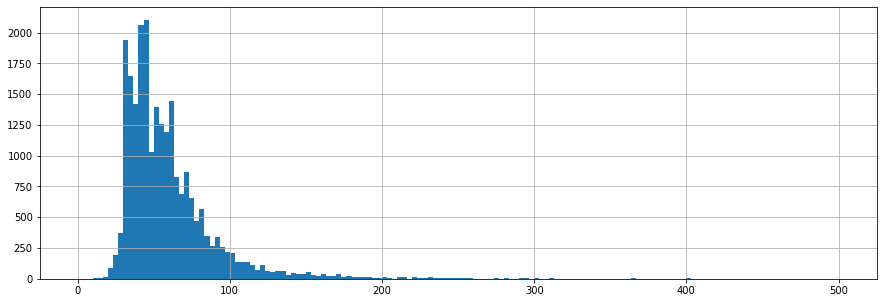

In [40]:
# строим гистограмму по столбцу total_area
data['total_area'].hist(bins= 150, range=(0, 500), figsize=(15,5))

In [41]:
# выводим описание данных значения столбца total_area
data['total_area'].describe()

count   23565.000000
mean       60.322824
std        35.657060
min        12.000000
25%        40.000000
50%        52.000000
75%        69.700000
max       900.000000
Name: total_area, dtype: float64

Площадь основной части квартир составляет от 30 до 100 метров. Основной пик мы видим на площади в 50-60 метров, есть более мелкий пик для квартир с меньшей площадью. 
Квартиры от 100 до 200 метров хоть и есть, но их совсем не много. Уже от 200 метров и далее видим совсем меткие выбросы данных. Максимальная площадь продаваемой квартиры из таблицы - 900 метров, это уже вовсе уникальное значение, его можно считать выбросом. 

Далее рассмотрим показатель цены:

<AxesSubplot:>

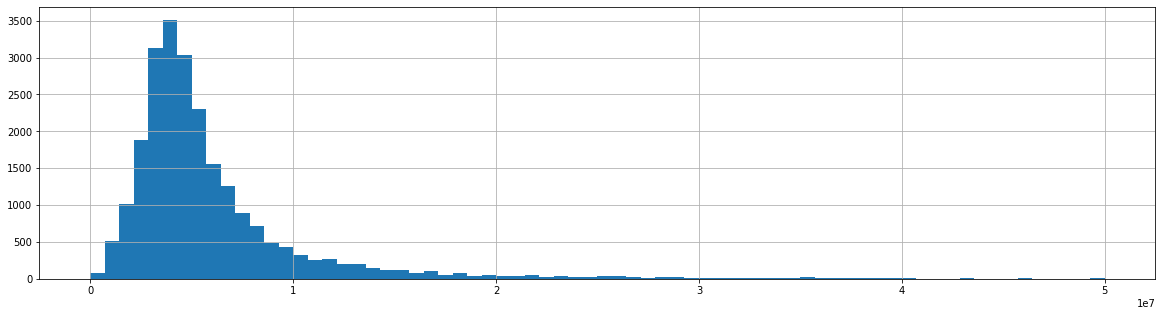

In [42]:
# выводим гистограмм по столбцу last_price
data['last_price'].hist(bins=70, range=(0,50000000), figsize=(20,5))

In [43]:
# выводим описание столбца last_price
data['last_price'].describe()

count       23565.000000
mean      6540058.260004
std      10910934.721514
min         12190.000000
25%       3400000.000000
50%       4646000.000000
75%       6790000.000000
max     763000000.000000
Name: last_price, dtype: float64

В основном стоимость квартир укладывается в промежуток до 10 млн. Есть небольшое количество весьма дешевых квартир. 
Цены от 20 млн очень редки, необходимо почистить такие выбросы данных для дальнейшего исследования. 

<AxesSubplot:>

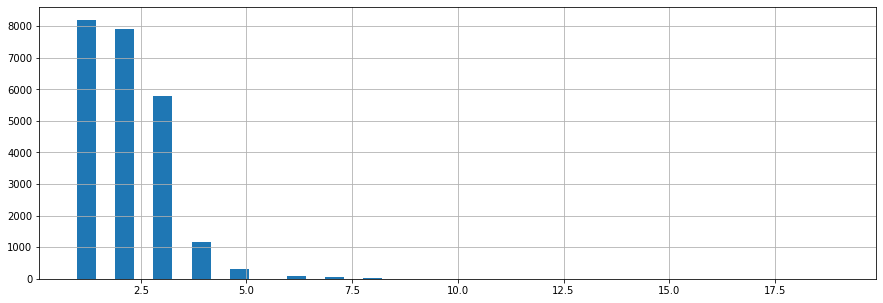

In [44]:
# строим гистограмму по столбцу rooms
data['rooms'].hist(bins=40, range=(1,19), figsize=(15,5))

In [45]:
# выводим описание данных столбца rooms
data['rooms'].describe()

count   23565.000000
mean        2.078888
std         1.066503
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

Чаще всего продаются квартиры с одной, двумя или тремя комнатами. Чуть реже с четырьмя и пятью комнатами. Больше 5 комнат - это весьма редкое явление. Есть один выброс - квартира с 19 комнатами. 

Проверим данные в столбце с величиной потолков:

<AxesSubplot:>

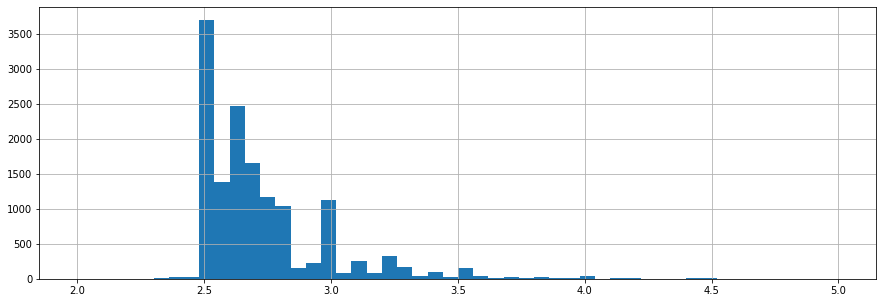

In [46]:
# строим гистограмму по столбцу ceiling_height
data['ceiling_height'].hist(bins=50, range=(2,5), figsize=(15,5))

In [47]:
# выводим описание столбца
data['ceiling_height'].describe()

count   14481.000000
mean        2.728859
std         0.298154
min         2.200000
25%         2.520000
50%         2.650000
75%         2.800000
max        10.300000
Name: ceiling_height, dtype: float64

В основном встречаются квартиры со стандартной высотой полотков - 2,65 - 2,7 метра. Однако есть квартиры как с более высокими, так и с более низкими потолками. Заметны пики на показателях 2,5 метра и 3 метра. 
После трех метров есть единичные значения, также видно значение в 10 метров потолков, которое мы вероятно пропустили на этапе предобработки данных. 

#### Изучение времени продажи квартиры 

Изучим данные о времени размещения объявления на сайте, чтобы определить какие значения нормальны, а какие обозначают, что процесс продажи выбивается из графика:

<AxesSubplot:>

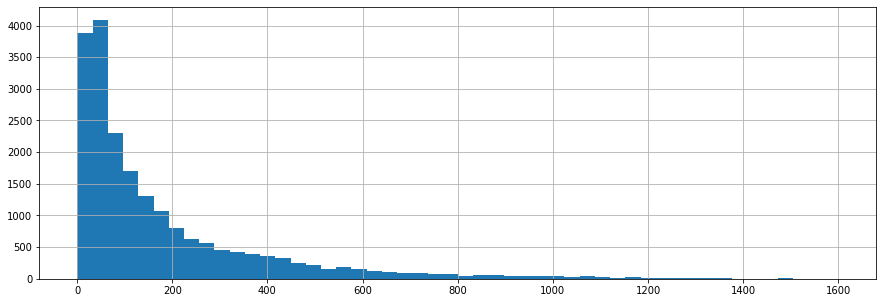

In [48]:
# построение гистограммы по данным столбца days_exposition
data['days_exposition'].hist(bins=50, range=(1,1600), figsize=(15,5))

In [49]:
# вывод описания данных в столбце days_exposition
data['days_exposition'].describe()

count   20394.000000
mean      180.741395
std       219.732782
min         1.000000
25%        45.000000
50%        95.000000
75%       231.000000
max      1580.000000
Name: days_exposition, dtype: float64

Минимальное количество дней размещения объявления - 1. В целом большинство пользователей снимали объявление в течении 200 дней с момента публикации. 
Среднее время продажи - 180 дней (6 месяцев)
Медианное время продажи почти в половину меньше - 95 дней (чуть больше 3х месяцев). 

В выборке достаточно много тех, кто искал покупателя и дольше. До 600 дней таких пользователей достаточно много. 
Есть некоторое количество значений, когда объявление висело дольше. Начиная от 1200 дней - это уже похоже на отдельные выбросы данных. 

Если объявление было снято в первые пару дней, то продажу можно считать быстрой. Если объявление висело больше 600 дней - то очень долгой. 

#### Убираем редкие и выбивающиеся значения

Некоторые выбивающиеся значения мы уже правили на этапе предобработки данных. Однако не выводили их в виде гистограмм, а в виде гистограмм хорошо видны именно выбросы значений. 

Пройдемся по столбцам, данные которых выводили. Первый столбец total_area, на этапе предобработки мы его не чистили. Видно, что после 200 метров количество квартир очень сильно снижается. 

Проверим какой процент от общего числа квартир в таблице занимают квартиры с площадью более 200 кв.м

In [51]:
# считаем долю квартиры с площадью более 200 метров от общего их числа
share_total_area = len(data[data['total_area']>200])/len(data['total_area'])
print(f'{share_total_area:.1%}')

1.0%


Доля таких квартир составляет 1%, мы можем их убрать:

In [52]:
# удаляем выбросы из столбца total_area
data = data.loc[data['total_area'] < 200]
# выводим описание столбца 
data['total_area'].describe()

count   23335.000000
mean       58.126632
std        26.449663
min        12.000000
25%        40.000000
50%        51.700000
75%        68.760000
max       199.200000
Name: total_area, dtype: float64

Готово, все выбросы по общей площади поправили!

В гистограмме по столбцу last_price есть квартиры чья цена более 20 млн, их очень мало. Они являются выбросами данных. 
Проверим какую долю от общего числа квартир они занимаю, можем ли мы их удалить:

In [53]:
# считаем долю квартир с ценой от 20 млн. 
share_last_price = len(data[data['last_price']>20000000])/len(data['last_price'])
print(f'{share_last_price:.1%}')

2.2%


2% это уже достаточно критично, но все равно не очень много. Можем их удалить, чтобы далее производить анализ по более свободным от выбросов данным:

In [54]:
# удаляем выбросы данных по столбцу last_price
data = data.loc[data['last_price'] < 20000000]
# выводим описание столбца
data['last_price'].describe()

count      22802.000000
mean     5388180.387115
std      3160709.440633
min        12190.000000
25%      3400000.000000
50%      4550000.000000
75%      6499749.250000
max     19999000.000000
Name: last_price, dtype: float64

Распределение цен стало достаточно равномерным. 

Исходя из данных гистограммы и столбца rooms значения выше 10 крайне редки в нашей выборке, их всего 7. Уберем их:

In [55]:
# срезд данных столбца rooms, где значение больше 10
data = data[data['rooms']<10]
# выводим описание данных столбца
data['rooms'].describe()

count   22801.000000
mean        2.010219
std         0.954045
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: rooms, dtype: float64

Со столбцом ceiling_height мы ранее уже произвели предобработку данных, но пропустили значение потолков в 10 метров. Оно кажется не слишком реальным. Уберем его:

In [56]:
# удаляем строку с высотой потолка в 10 метров
data = data[data['ceiling_height'] != 10]

Итак, на этом этапе мы убрали последние выбросы данных, почистили редкие и выбивающиеся значения. 

#### Изучение факторов влияющих на цену квартиры

Для проверки корреляции различных факторов выведем коэффициент корреляции по столбцам:

In [57]:
# выводим коэффициент корреляции по столбцам 'last_price', 'price_per_area' от других столбцов таблицы
corr_price = data.corr()[['last_price', 'price_per_area']].sort_values('price_per_area', ascending=False)
corr_price

,last_price,price_per_area
price_per_area,0.639077,1.000000
last_price,1.000000,0.639077
ponds_around_3000,0.300523,0.301139
kitchen_area,0.574304,0.292210
floors_total,0.116672,0.287431
parks_around_3000,0.280113,0.281699
ceiling_height,0.456951,0.279533
kitchen_total,-0.114526,0.269111
floor,0.092467,0.214857
total_images,0.158078,0.130812


Чтобы выводы более корректные построим диаграммы рассеяния по части параметров. В частности, проверим как влияет на цену площадь, число комнат, близость к центру, день, месяц и год, когда объявление было выложено:

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

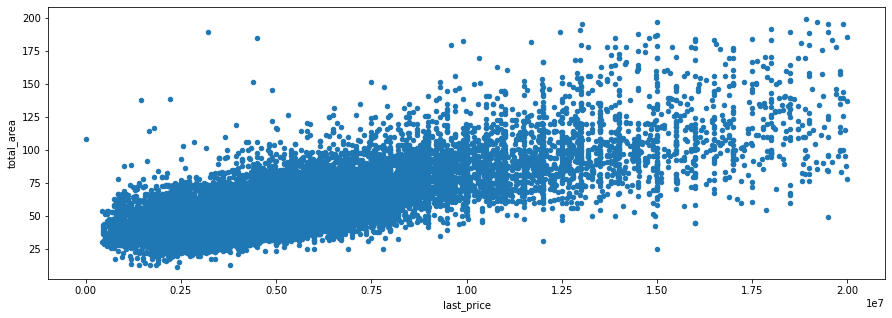

In [58]:
# диаграмма рассеяния зависимости цены от площади
data.plot(x='last_price', y='total_area', kind='scatter', figsize=(15,5)) 

Видно, что стоимость зависит от общей площади весьма сильно. Есть некоторые выпадающие значения, однако в целом зависимость прямая. 

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

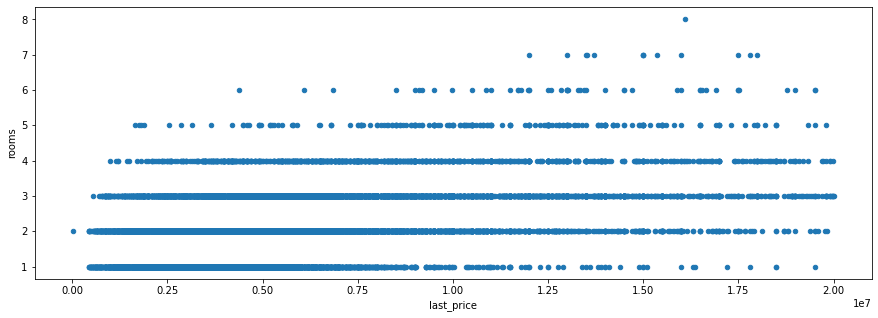

In [59]:
# диаграмма рассеяния зависимости цены от количества комнат
data.plot(x='last_price', y='rooms', kind='scatter', figsize=(15,5)) 

По диаграмме видно, что в целом количество комнат влияет на стоимость. Самая большая стоимость квартир с количеством комнат от 2х до 4ти. Однако далее зависимость падает.
Однако зависимость не такая сильная как от общей площади.

<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>

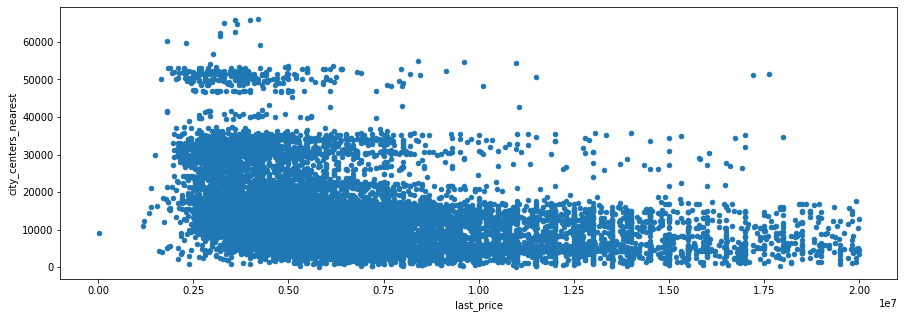

In [60]:
# диаграмма рассеяния зависимости цены от приближенности к центру города
data.plot(x='last_price', y='city_centers_nearest', kind='scatter', figsize=(15,5)) 

Цены, как ни странно, распределены довольно равномерно. Ближе к центру (до 20000 м) больший разброс цен, много и не дорогих вариантов, и очень очень дорогих. 
В целом видно, что чем дальше от центра, тем цена ниже. 

<AxesSubplot:xlabel='last_price', ylabel='first_exposition_month'>

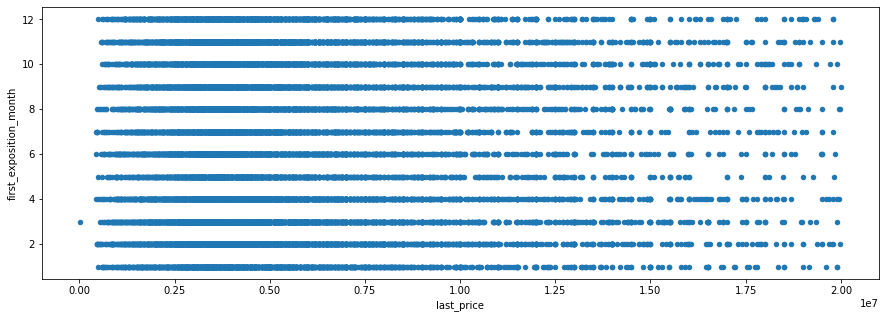

In [61]:
# диаграмма рассеяния зависимости цены от месяца размещения объявления
data.plot(x='last_price', y='first_exposition_month', kind='scatter', figsize=(15,5)) 

Сильной зависимости цены от месяца публикации нет. Чуть более дорогие объявления видим в феврале, апреле, сентябре и ноябре. Но разброс совсем не большой. 

<AxesSubplot:xlabel='last_price', ylabel='first_exposition_day'>

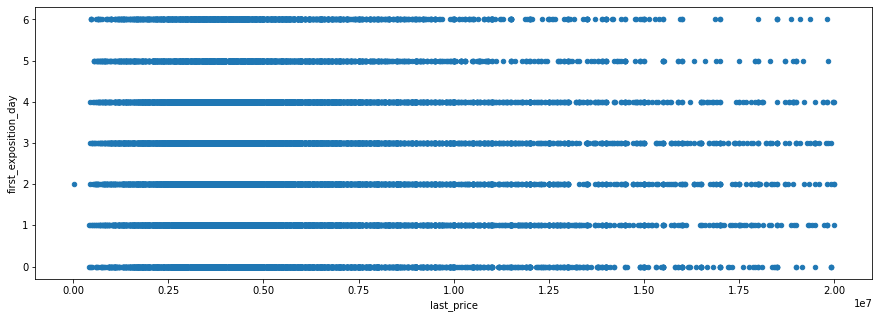

In [62]:
# диаграмма рассеяния зависимости цены от дня недели, когда было размещено объявление
data.plot(x='last_price', y='first_exposition_day', kind='scatter', figsize=(15,5)) 

Более дорогие объекты размещались на буднях со вторника по четверг. В выходные выкладывают меньше именно дорогих объектов. 

<AxesSubplot:xlabel='last_price', ylabel='first_exposition_year'>

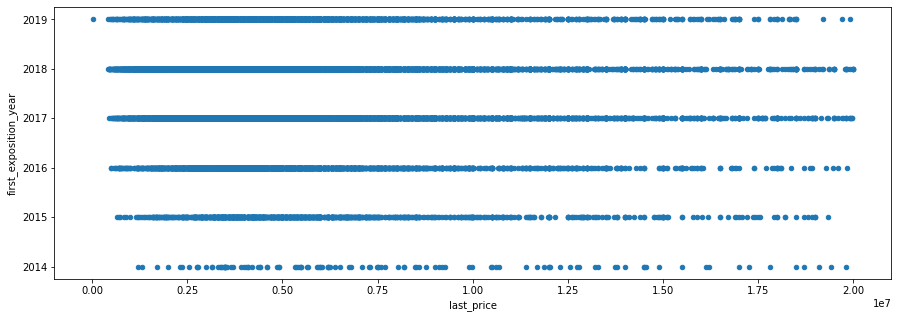

In [64]:
# диаграмма рассеяния зависимости цены от года размещения объявления
data.plot(x='last_price', y='first_exposition_year', kind='scatter', figsize=(15,5)) 

Объявления с самыми дорогими квартирами были выложены в 2017 и 2018 годах. 

Исходя из данных выборки больше всего цена за квадратный метр зависит от наличия водоемов и парков в 3000 метрах от дома, площади кухни, количества этажей в доме, высоты потолков и общей площади. 

Близость к центру имеет отрицательную корреляцию, это нормально. Чем больше расстояние от центра, тем ниже цена квартиры. Такие же данные видны на диаграмме. 

Самые дорогие объекты обычно выкладывают в будни. В выходные публикуют объявления с более дешевыми объектами. Самые дорогие объекты из нашей выборки были выложены в 2017 и 2018 годах. 
 
Рассмотрим более подробно влияние на цену того, на каком этаже расположена квартира:

In [65]:
# рассчитываем медианное значение цены квартиры в зависимости от категории этажа
floor_group = data.groupby(['floor_category'], as_index=False)['last_price'].median()
# выводим результат
floor_group

,floor_category,last_price
0,другой,4749500.000000
1,первый,3900000.000000
2,последний,4200000.000000


Мы не убирали какие-либо значения цен на квартиры, так как в целом они распределены равномерно. Однако брать среднее значение не очень корректно, так как ценовой разброс довольно большой. 
Для анализа берем медианное значение цены. 

Исходя из этих данных видно, что квартиры на первом этаже чаще всего имеют меньшую стоимость в сравнении с квартирами на других этажах. 
Квартиры на последнем этаже имеют также меньшую стоимость в сравнении с квартирами на других этажах, кроме первого. 

Итак, мы выяснили, что больше всего на стоимость влияет площадь кухни и общая площадь. 
Чуть меньше - близость парков, водоемов, высота потолков. Чем дальше квартира от центра, тем она дешевле.
Квартиры на первых и последних этажах часто стоят меньше, чем на средних.

#### Изучение населенных пунктов

Для изучения стоимости квадратного метра в разных населенных пунктах отсортируем населенные пункты по количеству объявлений и выведем 10 с самым большим количеством объявлений:

In [66]:
# добавляем в переменную top_local населенные пункты из таблицы data, считаем количество строк с ними
# сортируем по убыванию, выводим только первые 10 верних значений
top_local = data['locality_name'].value_counts().sort_values(ascending=False).head(10)
# выводим данные, которые сохранили
top_local

Санкт-Петербург      14914
Мурино                 586
поселок Шушары         439
Всеволожск             397
Пушкин                 359
Колпино                337
поселок Парголово      326
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Мы получили 10 населенных пунктов, где больше всего объявлений. Построим столбчатую диаграмму медианного значения цены за метр в каждом из этих населенных пунктов:

<AxesSubplot:xlabel='locality_name'>

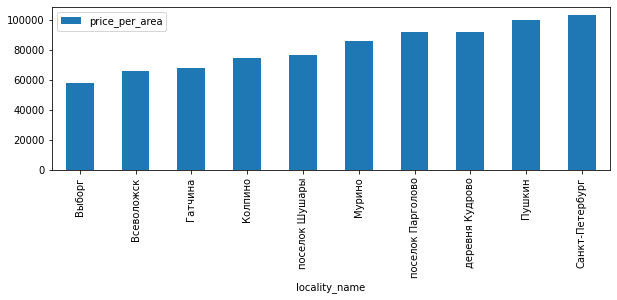

In [67]:
# создаем переменную price_per_area_local
price_per_area_local = (data
# добавляем в нее строки только с 10 населенными пунктами, которые входят в топ по количеству объявлений                        
 .query('locality_name in @top_local.index')
# приводим все это к сводной таблице, где фиксируем медианное значение цены за метр в зависимости от населенного пункта                        
 .pivot_table(index='locality_name', values='price_per_area', aggfunc='median')
# сортируем данные по возврастанию цены за метр                        
 .sort_values('price_per_area')
# создаем на основе этих данных столбчатую диаграмму размером 10 на 3                        
 .plot(kind='bar', figsize=(10,3)))

# выводим диаграмму на экран
price_per_area_local

Исходя из диаграммы видно, что самая высокая стоимость квадратного метра в Санкт-Петербурге. Следующим за ним идет Пушкин. 
Самая низкая стоимость квадратного метра из нашего топа населенных пунктов с самым большим количеством объявлений в Выборге.

#### Изучение цены квадратного метра в Санкт-Петербурге в зависимости от близости квартиры к центру

Для изучения цены квадратного метра в Санкт-Петербурге в зависимости от близости квартиры к центру добавим столбец, отображающий информацию о близости к центру в километрах:

In [68]:
# добавляем столбец city_centers_nearest_km, в него добавим значения столбца city_centers_nearest разделенное на 1000
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000

Выведем данные по Санкт-Петербургу в отдельную таблицу, и уберем строки из таблицы, где пропущены данные по близости к центру:

In [69]:
# создаем таблицу data_spb, добавляем в нее строки, где нет пропусков в столбце city_centers_nearest
# и в столбце locality_name указан Санкт-Петербург
data_spb = data.loc[~(data['city_centers_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург')]
# приводим значение столбца city_centers_nearest_km к целочисленному виду
data_spb['city_centers_nearest_km'] = data_spb['city_centers_nearest_km'].astype(int)
# выводим первые 5 строк новой таблицы для проверки
data_spb.head()

/tmp/ipykernel_68/1895047232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['city_centers_nearest_km'] = data_spb['city_centers_nearest_km'].astype(int)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_area,first_exposition_year,first_exposition_month,first_exposition_day,floor_category,kitchen_total,living_total,city_centers_nearest_km
0,20,13000000.000000,108.000000,2019-03-07,3,2.700000,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.000000,16028.000000,1,482.000000,2,755.000000,NaN,120370.370370,2019,3,3,другой,0.231481,0.472222,16
2,10,5196000.000000,56.000000,2015-08-20,2,NaN,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.000000,13933.000000,1,90.000000,2,574.000000,558.000000,92785.714286,2015,8,3,другой,0.148214,0.612500,13
4,2,10000000.000000,100.000000,2018-06-19,2,3.030000,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.000000,8098.000000,2,112.000000,1,48.000000,121.000000,100000.000000,2018,6,1,другой,0.410000,0.320000,8
7,5,7915000.000000,71.600000,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.900000,2,Санкт-Петербург,23982.000000,11634.000000,0,NaN,0,NaN,NaN,110544.692737,2019,4,3,другой,0.263966,NaN,11
9,18,5400000.000000,61.000000,2017-02-26,3,2.500000,9,43.600000,7,False,False,False,6.500000,2,Санкт-Петербург,50898.000000,15008.000000,0,NaN,0,NaN,289.000000,88524.590164,2017,2,6,другой,0.106557,0.714754,15


Далее из уже созданной таблицы мы создаем две сводные:
- средняя цена квадратного метра для каждого километра удаленности от центра
- средняя стоимость квартиры для каждого километра 

In [70]:
# создаем таблицу agv_price_per_area, добавляем среднюю цену квадратного метра в зависимости от киллометра
agv_price_per_area = data_spb.pivot_table(index='city_centers_nearest_km', values='price_per_area')
# создаем таблицу agv_last_price, добавляем среднюю цену квартиру в зависимости от киллометра
agv_last_price = data_spb.pivot_table(index='city_centers_nearest_km', values='last_price')

Строим график на основе данных новых таблиц:

<AxesSubplot:xlabel='city_centers_nearest_km'>

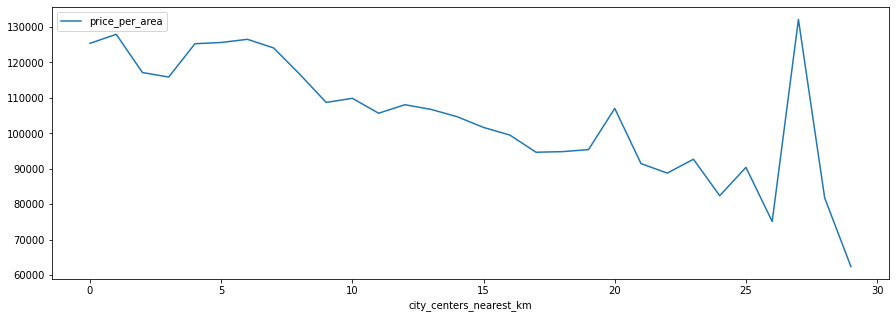

In [71]:
# строим график на основе данных из agv_price_per_area
agv_price_per_area.plot(figsize=(15,5))

<AxesSubplot:xlabel='city_centers_nearest_km'>

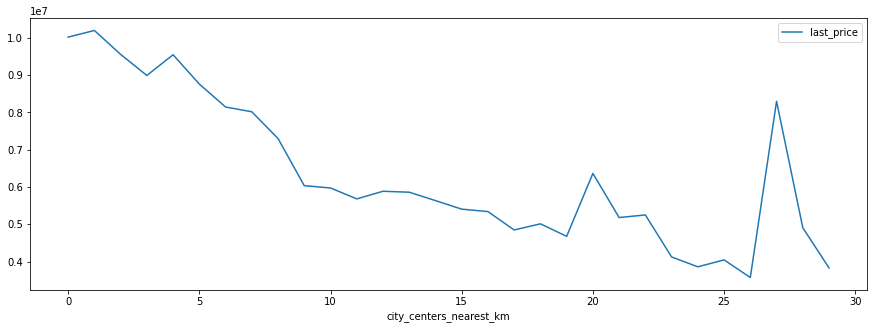

In [72]:
# создаем график из agv_last_price
agv_last_price.plot(figsize =(15,5))

Цена квадратного метра растет относительно равномерно. Особенно резкий рост наблюдается, если рассматривать данные от 0 до 10 километров. По графику зависимости цены от близости к центру это видно особенно. 

Исходя из этого делаем вывод, что центральная часть города находится на расстоянии от 0 до 10 километров от центральной его точки.

#### Анализ квартир в центре

В прошлом исследовании мы заметили, что центр города находится в пределах от 0 до 10 километров от центральной точки. 
Добавил все строки с объектами из Санкт-Петербурга в отдельную таблицу при условии, что они находятся на этом расстоянии:

In [73]:
# создаем таблицу data_spb_center, добавляем в нее строки, в столбце которых city_centers_nearest_km меньше 10
data_spb_center = data_spb[data_spb['city_centers_nearest_km']<10]
# для проверки выводим первые 5 строк таблицы
data_spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_area,first_exposition_year,first_exposition_month,first_exposition_day,floor_category,kitchen_total,living_total,city_centers_nearest_km
4,2,10000000.000000,100.000000,2018-06-19,2,3.030000,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.000000,8098.000000,2,112.000000,1,48.000000,121.000000,100000.000000,2018,6,1,другой,0.410000,0.320000,8
21,13,3200000.000000,31.600000,2018-03-14,1,NaN,5,16.900000,2,False,False,False,5.700000,1,Санкт-Петербург,36064.000000,9722.000000,1,248.000000,0,NaN,310.000000,101265.822785,2018,3,2,другой,0.180380,0.534810,9
24,8,6500000.000000,97.200000,2015-10-31,2,NaN,3,46.500000,1,False,False,False,19.600000,0,Санкт-Петербург,20052.000000,2336.000000,3,411.000000,3,124.000000,265.000000,66872.427984,2015,10,5,первый,0.201646,0.478395,2
35,6,15500000.000000,149.000000,2017-06-26,5,NaN,5,104.000000,4,False,False,False,17.000000,0,Санкт-Петербург,23670.000000,3502.000000,0,NaN,1,779.000000,644.000000,104026.845638,2017,6,0,другой,0.114094,0.697987,3
52,20,11795000.000000,136.000000,2017-09-22,6,3.000000,2,94.000000,2,False,False,False,11.000000,1,Санкт-Петербург,16510.000000,6582.000000,1,526.000000,0,NaN,NaN,86727.941176,2017,9,4,последний,0.080882,0.691176,6


Проверим чем отличаются квартиры в центре от всех кватир в нашей таблице:

<AxesSubplot:>

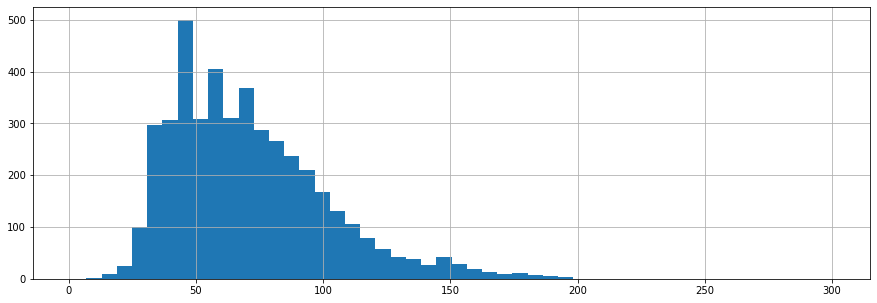

In [82]:
# строим гистограмму по общей площади квартир в центре
data_spb_center['total_area'].hist(bins=50, range=(1,300), figsize=(15,5))

Квартиры в центре обычно от 30 до 100 кв.м. Виден большой пик на 40 кв. метрах. 

<AxesSubplot:>

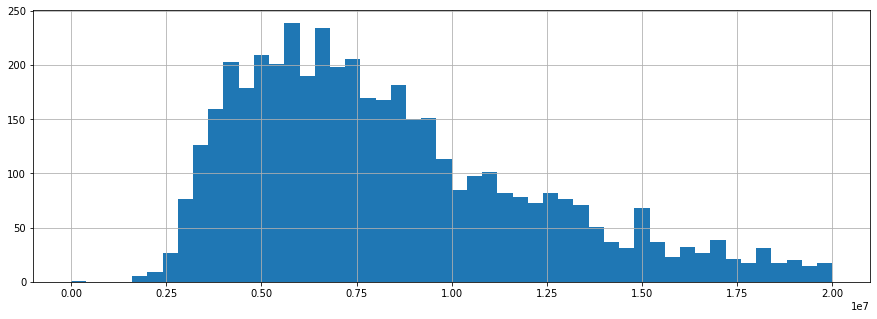

In [97]:
# строим гистограммы по цене квартир в центре
data_spb_center['last_price'].hist(bins=50, range=(0,20000000), figsize=(15,5))

В основном стоимость квартир в центре от 3х млн до 10 млн. Однако есть достаточное количество весьма дорогих объектов до 20 млн.

<AxesSubplot:>

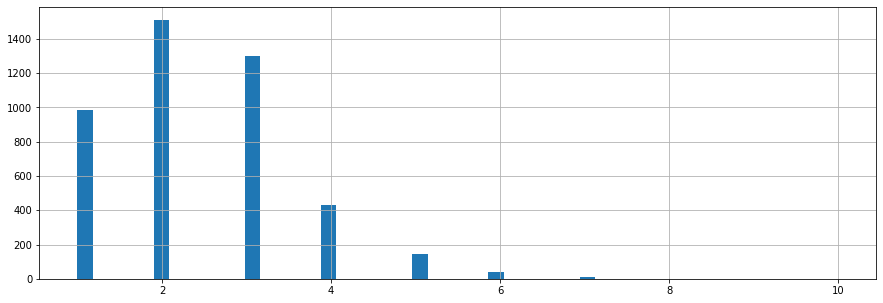

In [91]:
# строим гистограмму по количеству комнат в квартирах в центре
data_spb_center['rooms'].hist(bins=50, range=(1,10), figsize=(15,5))

В основном в центре продают 2х комнатные квартиры. Реже 1 или 3х комнатные. Однако иногда появляются варианты и с большим количеством комнат. Например, с 6тью.

<AxesSubplot:>

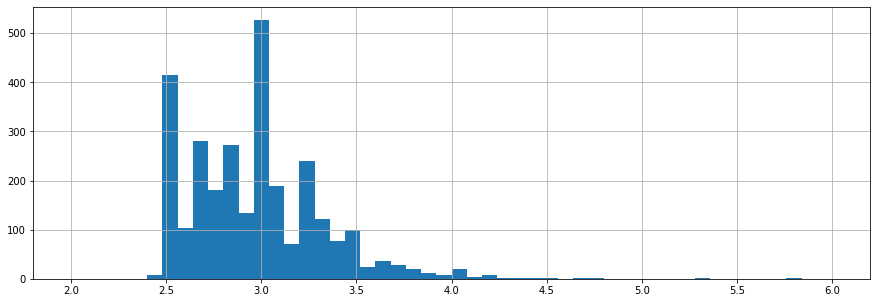

In [95]:
# строим гистограмму по высоте пололков в квартирах в центре
data_spb_center['ceiling_height'].hist(bins=50, range=(2,6), figsize=(15,5))

Высота потолков для квартир в центральной части города выше, чем в целом по городу. Наиболее часто встречаются объекты с потолками высотой 3 метра. 

Для проверки зависимости цены от других параметров проверим коэффициент корреляции:

In [75]:
# считаем коэфф. корреляции
corr_price_center = data_spb_center.corr()[['last_price', 'price_per_area']].sort_values('price_per_area', ascending=False)
corr_price_center

,last_price,price_per_area
price_per_area,0.432242,1.000000
last_price,1.000000,0.432242
kitchen_total,-0.118136,0.353469
kitchen_area,0.542016,0.166994
balcony,0.082012,0.158687
floors_total,0.026882,0.157475
ponds_around_3000,0.145104,0.140262
floor,0.073504,0.128433
total_images,0.129700,0.119740
is_apartment,0.013514,0.095889


Чтобы наши выводы были точнее, как и ранее построим диаграммы рассеяния по параметрам зависимости цены от площади, количества комнат, удаленности от центра, дня, недели и месяца, когда объявление было опубликовано:

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

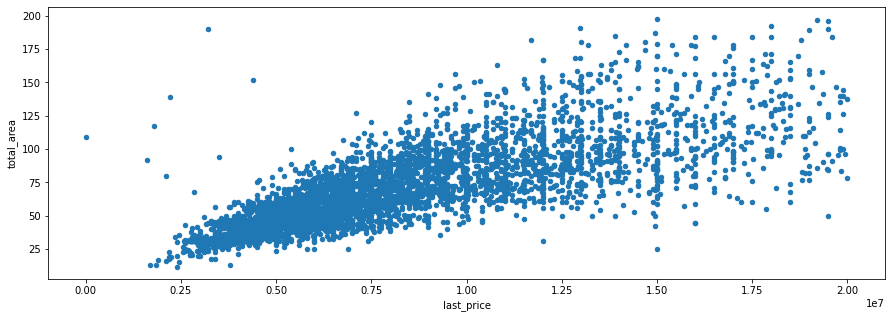

In [76]:
# строим диаграмму рассеяния по зависимости цены квартиры от площади
data_spb_center.plot(x='last_price', y='total_area', kind='scatter', figsize=(15,5)) 

Видим примерно ту же картину, что и раньше. Цена зависит от площади.

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

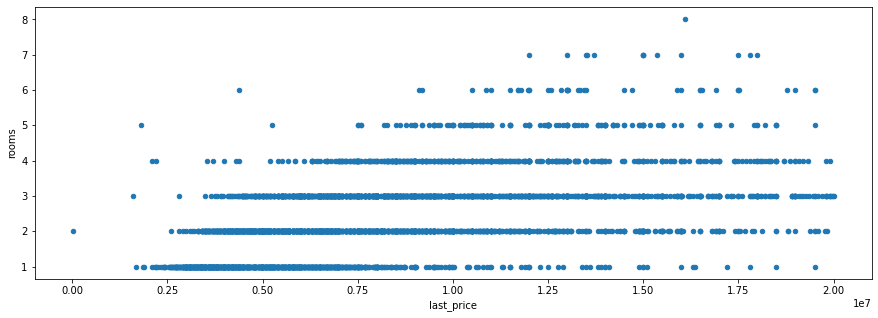

In [77]:
# строим диаграмму рассеяния по зависимости цены от количества комнат
data_spb_center.plot(x='last_price', y='rooms', kind='scatter', figsize=(15,5)) 

Квартиры с количеством комнат от 2х до 4х ценятся выше остальных.

<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>

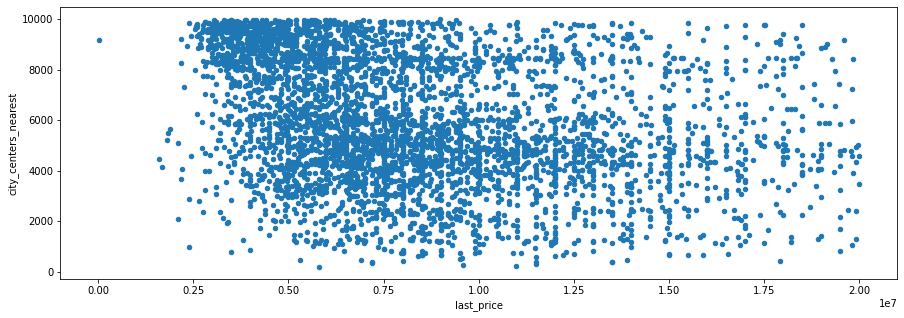

In [78]:
# строим диаграмму рассеяния по зависимости цены квартиры от удаленности от центра
data_spb_center.plot(x='last_price', y='city_centers_nearest', kind='scatter', figsize=(15,5)) 

Стоимость квартир в центре распределяется равномерно. Мы заметили это еще на графике общих данных. Есть очень дешевые и более дорогие варианты. 
В основном квартиры в центре стоят от 3х до 10 млн. 

<AxesSubplot:xlabel='last_price', ylabel='first_exposition_month'>

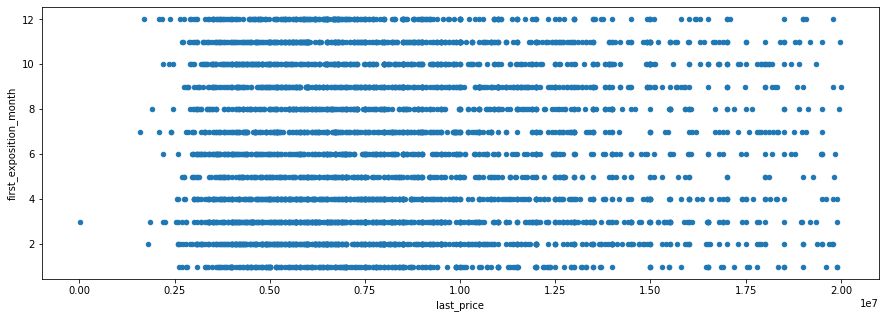

In [79]:
# строим диаграмму рассеяния по зависимости цены от месяца размещения объявления
data_spb_center.plot(x='last_price', y='first_exposition_month', kind='scatter', figsize=(15,5)) 

Разница между месяцами, когда было выложено объявление не слишком заметна. В целом стоимость объектов по месяцам распределяется относительно равномерно.  

<AxesSubplot:xlabel='last_price', ylabel='first_exposition_day'>

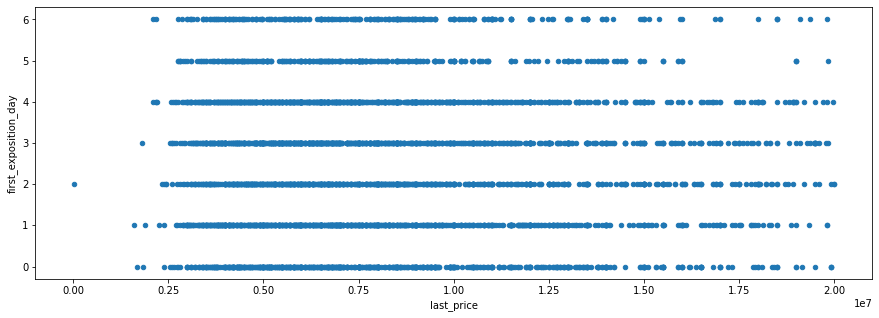

In [80]:
# строим диаграмму рассеяния по дням недели
data_spb_center.plot(x='last_price', y='first_exposition_day', kind='scatter', figsize=(15,5)) 

Вновь видим, что наиболее дорогие объекты не выкладывают на выходных. Чаще всего их выкладывают в будни. Возможно, потому что продажей таких объектов занимаются не сами владельцы, а агенты по недвижимости. 

<AxesSubplot:xlabel='last_price', ylabel='first_exposition_year'>

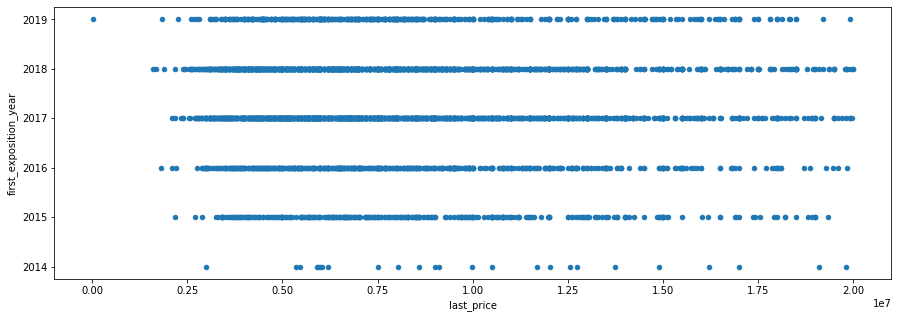

In [81]:
# строим диаграмму рассеяния по зависимости цены от года размещения объявления
data_spb_center.plot(x='last_price', y='first_exposition_year', kind='scatter', figsize=(15,5)) 

Самые дорогие объекты выкладывали в 2018 и 2017 годах. 

В основном на квартиры в центре влияют те же факторы - общая площадь, площадь кухни, наличие водоемов поблизости, неожиданно стало влиять наличие балкона.

Особой разницы с квартирами вне центра в данных о времени размещения объявления нет. Все также в выходные редко выкладывают очень дорогие объекты. В 2017 и 2018 годах также были выложены объявления с самыми дорогими квартирами. 

Близость к центру все также влияет на стоимость квартиры. Однако ближе к центру есть как очень дорогие, так и наиболее дешевые объекты из нашей выборке. 

Все также квартиры от 2х до 4 комнат в среднем дороже, чем с меньшим или большим их количеством.

## Общий вывод

Для проведения исследования необходимо было произвести обработку данных. 
В процессе обработки были заменены отсутствующие значения в столбцах 'balcony','parks_around_3000','ponds_around_3000' на ноль. В столбце 'is_apartment' пропуски были заменены значением False. Нулевые данные столбца 'rooms' заменили единицей. 


Мы удалили примерно 5% данных из таблицы. 
Это пропуски в столбцах 'floors_total' и 'locality_name', выбросы в столбцах 'total_area' и 'last_price', аномальные значения других столбцов.


Что выяснили:
- среднее время продажи квартиры - 180 дней. Если объявление провисело 600 дней и более, то продажу можно считать очень долгой 
- квартиры на первых и последних этажах обычно дешевле, чем на средних
- более дорогие объекты обычно выкладывают в будние дни, в выходные выкладывают объявления более дешевых объектов 
- самая высокая цена на квартиры - в центре города. Центральная часть находится на расстоянии до 10 км от центральной точки города
- в центральной части объекты равномерно распределяются по цене: есть как очень дешевые, так и очень дорогие варианты
- квартиры в центре обычно имеют более высокие потолки, чем квартиры на более далеком от центра расстоянии
- из 10 населенных пунктов с самым большим количеством объявлений самые дорогие объекты находятся в Санкт-Петербурге, более дешевые в Выборге


При проведении исследования получилось, что в основном на стоимость квартиры влияет ее общая площадь, площадь кухни, близость к паркам и водоемам, близость к центру, высота потолков. 
На стоимость квартир в центре также влияет количество балконов, в меньшей степени есть влияние высоты потолков поскольку в центре они как правило выше. 
На стоимость будет влиять то, на каком этаже расположена квартира, и в целом количество этажей в доме. 


В исследовании не были рассмотрены такие признаки как материал дома, близость социально значимых объектов, крупных магазинов, автомобильных развязок, метро. Для более подробного анализа необходимо добавить данные параметры. 
Для улучшения качества данных можно сделать более жесткие требования к заполнению форм или возможность выбора из нескольких параметров без возможности пропустить какой-либо шаг. 